# Comparing Multilayer Perceptron with Support Vector Machine

### by Mitchell Thomas

In this project, I will build a multilayer perceptron using Sci-Kit Learn, and then build a Support Vector Machine with the same data and compare the two performances. This was a project that was assigned within my Principles of Machine Learning course.

***

I will also evaluate my SVM model with K-fold cross validation techniques, where K = 5.
***
## Step 1: Import packages and initialize vectors

After importing needed packages for the purposes of this project, I initially break the Data up into a feature vector and label vector.  The label vector is where I will perform the predictions and the feature vector is the data that I will use to predict a classification.

***

Futhermore, I will break up the initial vectors into Training sets for the feature and label vectors and Testing sets for the feature and label vectors as well.



In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from random import shuffle

import numpy as np
import pandas as pd
import sys
import struct
import csv
import os
import matplotlib.pyplot as plt
from random import shuffle


# open the csv file, shuffle, and transform into suitable Attribute and class 
# vectors

wbc = pd.read_csv('breastcancer.csv')

# shuffle
wbc = wbc.sample(frac=1)

X = wbc.iloc[:,1:9]
y = wbc.iloc[:,10]

# splitting up training and testing data into appropriate vectors for initial 
# group

X_train, X_test, y_train, y_test = train_test_split(X, y)



## Step 2: Data Pre-Processing


Standardization is important when building a machine learning model as it creates a Gaussian or normal distribution of the data in the feature vectors so that the predictor model can learn from all of the data, even if extreme, effectively. We accomplish this process using Sci Kit Learn's StandardScaler() function. 

***

This also regularizes the data to prevent overfitting.


In [0]:
#############################
# INITIAL GROUP PRE-PROCESSING | MLP
#############################

# Preprocessing - standardize and normalize with sklearn build-in fcn

stdScaler = StandardScaler()

stdScaler.fit(X_train)

X_train = stdScaler.transform(X_train)
X_test = stdScaler.transform(X_test)



## Step 3: Build the Multilayer Perceptron



1.   We will initialize the multilayer perceptron using Sci-Kit Learn

2.  We will call the fit() function on our MLP classifier, which in this case is called nn.  We fit our model to the training vectors we initialzed above.

3. The model is fitted, so now we create a vector of the predictions that the model makes on a testing set.

4. For extra visualization I present a confusion matrix that compares my predictions with the correct labels. (If you are not familiar with confusion matrices, for now just know that values along the diagonal represent correct predictions).  This also leads us to an accuracy percentage by dividing the sum of correct predictions by the sum of values in the y_test vector.  



In [16]:
#############################
# BUILDING THE INITIAL MLP
#############################

# I built the Multilayer Perceptron using sklearn

# initialize our Multilayer Perceptron
nn = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

# fit the neural network model
nn.fit(X_train, y_train)

#create a vector of the actual predictions
predictions = nn.predict(X_test)

# print a confusion matrix visual
print(confusion_matrix(y_test,predictions))

# print a table that identifies prediction outputs
print(classification_report(y_test,predictions))

print("Total MLP model accuracy: " + str(accuracy_score(y_test, predictions, 
                                                        normalize=True, 
                                                        sample_weight=None)))


[[112   7]
 [  6  50]]
              precision    recall  f1-score   support

           2       0.95      0.94      0.95       119
           4       0.88      0.89      0.88        56

   micro avg       0.93      0.93      0.93       175
   macro avg       0.91      0.92      0.92       175
weighted avg       0.93      0.93      0.93       175

Total MLP model accuracy: 0.9257142857142857


## Step 4: Visualize Linear Separability by Plotting a Learning Curve

**What is Linear Separability?**

Linear Separability refers to checking if one can completely separate classification of data in an n-dimensional space using N - 1 dimensions.  For example, if classification of data is plotted on a single line, if the classes can be separated by a single point it is linearly separable.  Another example is if you can separate classification data by a straight line on a 2-D plot.

**Our Learning Curve**

From looking at this specific learning curve, the perceptron does not converge and so we can determine that the data in this case is not linearly separable, and with that knowledge, we know that we should use at least one hidden layer in our model.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


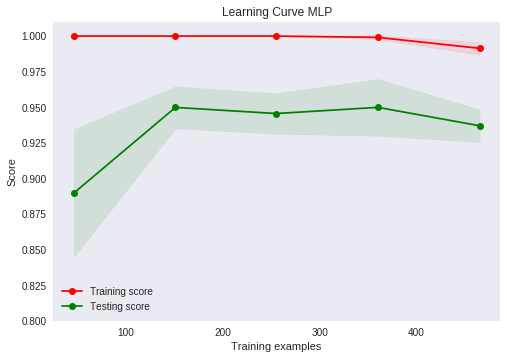

In [17]:
#############################
# LEARNING CURVE USING SKLEARN
#############################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

# The plot_learning_curve function defined below is from sklearn
# Here is the source 
# https://scikit-learn.org/stable/auto_examples/model_selection/
# plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve MLP"
estimator = nn
plot_learning_curve(estimator, title, X, y, (0.8, 1.01))

plt.show()

# From the learning curve plot, we can determine that this data is not linearly 
# separable as the Perceptron does not converge.  This means that we will need
# at least one hidden layer.  As one hidden layer will do the job, the number of
# neurons in that hidden layer we would use would be as a rule of thumb
# around 3 - 5 times the amount of input neurons we have.



## Step 5: Building a Support Vector Machine on same dataset

We start building our support vector machine by establishing a svm under the variable vectorMachine with a linear kernel function. We will use a linear function as our SVM will predict on a 2-dimensional space, as our input vector contains one dimensional data.

***

**What is a kernel function?**

This is a key attribute of the SVM model as it is a mathematical function that transforms data into higher dimensional space so that the machine can perform faster calculations (i.e. like creating vectors that serve as boundaries for specific classifications in data).

***

Next, we fit (train) the machine with a function that operates on our testing sets. 

***

**How does a support vector machine work?**

After the kernel function has been applied to our data and we have an appropriate n-dimensional space, the support vector machine finds an optimal hyperplane, or separating line, between the classifications, but as close to the nearest classification as possible.  After the machine has determined the hyperplane it classifies the data, by quickly configuring if incoming data is on either side of the hyperplane.

***
Finally, after the SVM is fitted and ready for new data, we use the predict() function provided by Sci-Kit Learn and create a vector of predictions on the prime testing set of the Wisconsin Breast Cancer data. And just like the Multilayer Perceptron model above, we can determine model accuracy by dividing the sum of correct predictions the SVM makes by the length of the label vector, y_test.

**Although, it's close, the SVM model generally is getting better results!**



## Why does a SVM model work better on this data than a Multilayer perceptron?

By default, SVM's usually have higher prediction accuracy than a multilayer perceptron. SVM's might have higher runtime as there are calculations it performs that are advanced like translating n-dimensional space using kernel functions. But it usually does a very good job in its predictions.

***

In this dataset, we are classifying breast cancer outcomes by various attributes that are observed with each patient. The two classifications our models are predicting are either benign or malignant. This data specifically is prime for an SVM model, as it can easily find the perfect hyperplane after translating the data using its kernel function.

In [18]:
#############################
# BUILDING THE SVM
#############################

from sklearn import svm
from sklearn import metrics

# I built the Support Vector Machine using appropriate functions from sklearn
# libraries

vectorMachine = svm.SVC(kernel='linear')

#Train the model using the training sets
vectorMachine.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = vectorMachine.predict(X_test)

# Model Accuracy

print("Total SVM model accuracy: ", metrics.accuracy_score(y_test, y_pred))

# The Support Vector Machine is on average more accurate than the MLP 
# Classification

Total SVM model accuracy:  0.9371428571428572


## Step 6: Evaluating the SVM Model with 5-fold Cross Validation Techniques

The purpose of this is to cross validate the accuracies the SVM model has on K different versions of the dataset.  In this case 5 different versions. 
***
**How I think of cross-validation techniques**

I like to envision 5-fold cross validations as almost like a balance beam visual, where one side is the training portion and the other side is the testing portion of the data, and we have 5 equal weights dispersed across the balance beam.  We start with 1 on testing side and 4 on the training side and then we take from training to testing with K iterations training our model.  So eventually every combination will be tried and it is quite thorough in determining model accuracy.
***
**Following the code:**

1. We splite our data into 5-fold groups 
2. We pre-process the data, just like we did when we initialized our vectors for the two models above
3. Then we train the model we are testing based on these newly split training sets
4. Predict accuracy exactly like above, but this time it is with the K-split, in our case 5-split, training sets.



In [19]:
#############################
# 5-FOLD CROSS VALIDATION - in order to test my Support Vector Machine accuracy
#############################

# split training and testing data into appropriate 5-fold vectors

X_for_Kfold = np.array(X_train)
             
y_for_Kfold = np.array(y_train)
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, j in kf.split(X_for_Kfold):
   X_train2, X_test2 = X_for_Kfold[i], X_for_Kfold[j]
   y_train2, y_test2 = y_for_Kfold[i], y_for_Kfold[j]

  
# pre-process the data

stdScaler.fit(X_train2)

X_train2 = stdScaler.transform(X_train2)
X_test2 = stdScaler.transform(X_test2)

#Train the model using the training sets
vectorMachine.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred2 = vectorMachine.predict(X_test2)

# Model Accuracy

print("Total 5-fold SVM model accuracy: ", 
      metrics.accuracy_score(y_test2, y_pred2))

Total 5-fold SVM model accuracy:  0.9903846153846154


## Conclusion

I found this experiment very conclusive!  It performed pretty much how it was supposed to:


*   The Multilayer Perceptron performed pretty well on the data--upwards of 90%.
*   The superior performing SVM stole the show, but barely, with a little more predictive accuracy
*   When put to a thorough test, the SVM showed its strength in the cross-validation evaluation with a 99% percent accuracy.

